# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

In [1]:
# Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import praw
import credentials


In [28]:
# Uncomment the line below to delete the LawrenceTheFans.db file and start over
# !rm LawrenceTheFans.db

# Create a connection to the SQLite database
db = sqlite3.connect('LawrenceTheFans.db')

# Create a cursor
cursor = db.cursor()


In [3]:
# Create the POSTS table
cursor.execute('''CREATE TABLE IF NOT EXISTS posts (
    id TEXT PRIMARY KEY, 
    author TEXT NOT NULL, 
    title TEXT NOT NULL, 
    created_utc INTEGER NOT NULL, 
    permalink TEXT NOT NULL,
    score INTEGER NOT NULL,
    num_comments INTEGER NOT NULL,
    url TEXT
)''')

In [7]:
# Create the COMMENTS table
cursor.execute('''CREATE TABLE IF NOT EXISTS comments (
    id TEXT PRIMARY KEY, 
    submission_id TEXT NOT NULL,
    parent_id TEXT,
    created_utc INTEGER NOT NULL, 
    author TEXT NOT NULL, 
    permalink TEXT NOT NULL,
    score INTEGER NOT NULL,
    body TEXT NOT NULL,
    FOREIGN KEY (submission_id) REFERENCES posts(id)
)''')

In [4]:
# Create a Reddit instance using credentials from the credentials.py file
reddit = praw.Reddit(client_id=credentials.client_id,
    client_secret=credentials.client_secret,
    user_agent=credentials.user_agent)

In [5]:
# Get the new posts from the subreddit "LawrenceTheFans"
lawrence_subreddit = reddit.subreddit("LawrenceTheFans").new( limit=1000 )

for p in lawrence_subreddit:
    try:
       # replace single quotes with two single quotes or else the insert will fail
       title = p.title.replace("'", "''")

       # Construct the insert statement and commit to the database
       cursor.execute(f"INSERT INTO posts VALUES ('{p.id}', '{p.author}', '{title}', {p.created_utc}, '{p.permalink}', '{p.score}','{p.num_comments}','{p.url}')")
       db.commit()
    except Exception as e:
        print(f"{e} {p.id} {title}")

In [6]:
# Display the first 10 posts to verify the inserts
for row in cursor.execute("SELECT * FROM posts ORDER BY created_utc DESC LIMIT 10"):
    print(row)

('1g3wmm0', 'canislupus519', 'Halloween Costumes October 30 Show @ History', 1728956635, '/r/LawrenceTheFans/comments/1g3wmm0/halloween_costumes_october_30_show_history/', 1, 0, 'https://www.reddit.com/r/LawrenceTheFans/comments/1g3wmm0/halloween_costumes_october_30_show_history/')
('1g3kvww', 'Micosilver', 'The Masonic SF set list', 1728925522, '/r/LawrenceTheFans/comments/1g3kvww/the_masonic_sf_set_list/', 13, 3, 'https://i.redd.it/qxlafhc87rud1.jpeg')
('1g3ktgc', 'Micosilver', 'Lawrence ft. Lindsey Lomis: "Say My Name" Destiny\'s Child cover, 10.12.24, San Francisco', 1728925359, '/r/LawrenceTheFans/comments/1g3ktgc/lawrence_ft_lindsey_lomis_say_my_name_destinys/', 6, 0, 'https://youtu.be/ciIhS-P9KSk')
('1g37jhv', 'Lonely-Armadillo-473', '1 ticket to Seattle show?', 1728877991, '/r/LawrenceTheFans/comments/1g37jhv/1_ticket_to_seattle_show/', 1, 0, 'https://www.reddit.com/r/LawrenceTheFans/comments/1g37jhv/1_ticket_to_seattle_show/')
('1g37b0m', 'Amazing_Shine5070', 'Vancouver Fans G

In [8]:
# Get comments from the subreddit "LawrenceTheFans"
lawrence_comments = reddit.subreddit("LawrenceTheFans").comments(limit=1000)
for c in lawrence_comments:
    # replace single quotes with two single quotes or else the insert will fail
    body = c.body.replace("'", "''")
    try:
        # Construct the insert statement and commit to the database
       cursor.execute(f"INSERT INTO comments VALUES ('{c.id}','{c.submission.id}', '{c.parent_id}', {c.created_utc}, '{c.author}', '{c.permalink}','{c.score}', '{body}')")
       db.commit()
    except Exception as e:
        print(f"{e} {c.id} {c.permalink}")

In [9]:
# Display the first 10 comments to verify the inserts
for row in cursor.execute("SELECT * FROM comments ORDER BY created_utc DESC LIMIT 10"):
    print(row)

('lry83e9', '1fxom5d', 't3_1fxom5d', 1728945278, 'NovelTeacup', '/r/LawrenceTheFans/comments/1fxom5d/seeking_seattle_tix/lry83e9/', 1, 'I have two Balcony Row L tickets for the Seattle 10/15 show - could sell for $45 each, just a little under what we paid for tickets + fees!')
('lry6zyt', '1g2z6pe', 't1_lruk4p9', 1728944876, 'OfficialSandwichMan', '/r/LawrenceTheFans/comments/1g2z6pe/saw_them_last_night_at_the_masonic_and_they_were/lry6zyt/', 1, 'Oops, I was high and read even as Evan')
('lrxm3z0', '1g37b0m', 't3_1g37b0m', 1728937930, 'AffectionateDebt7781', '/r/LawrenceTheFans/comments/1g37b0m/vancouver_fans_going_to_commodore_this_wednesday/lrxm3z0/', 2, "Bought a solo ticket. I went on a date with someone and turns out they're going to the same show. So excited!!\xa0")
('lrxg7e2', '1g3kvww', 't1_lrxf9r2', 1728936093, 'Micosilver', '/r/LawrenceTheFans/comments/1g3kvww/the_masonic_sf_set_list/lrxg7e2/', 1, 'Right. They said that the VIP people ("The Accounting Department") chose one s

In [10]:
# Create dataframes from the tables to aid in data exploration
posts_df = pd.read_sql_query("SELECT * FROM posts", db)
comments_df = pd.read_sql_query("SELECT * FROM comments", db)

In [11]:
# peek at the data
posts_df

,id,author,title,created_utc,permalink,score,num_comments,url
0,1g3wmm0,canislupus519,Halloween Costumes October 30 Show @ History,1728956635,/r/LawrenceTheFans/comments/1g3wmm0/halloween_...,1,0,https://www.reddit.com/r/LawrenceTheFans/comme...
1,1g3kvww,Micosilver,The Masonic SF set list,1728925522,/r/LawrenceTheFans/comments/1g3kvww/the_masoni...,13,3,https://i.redd.it/qxlafhc87rud1.jpeg
2,1g3ktgc,Micosilver,"Lawrence ft. Lindsey Lomis: ""Say My Name"" Dest...",1728925359,/r/LawrenceTheFans/comments/1g3ktgc/lawrence_f...,6,0,https://youtu.be/ciIhS-P9KSk
3,1g37jhv,Lonely-Armadillo-473,1 ticket to Seattle show?,1728877991,/r/LawrenceTheFans/comments/1g37jhv/1_ticket_t...,1,0,https://www.reddit.com/r/LawrenceTheFans/comme...
4,1g37b0m,Amazing_Shine5070,Vancouver Fans Going to Commodore this Wednesday?,1728877158,/r/LawrenceTheFans/comments/1g37b0m/vancouver_...,2,1,https://www.reddit.com/r/LawrenceTheFans/comme...
...,...,...,...,...,...,...,...,...
595,8qt2v3,MoveItFootballHead1,My favorite Lawrence vid on the interwebz,1528901993,/r/LawrenceTheFans/comments/8qt2v3/my_favorite...,7,1,https://www.youtube.com/watch?v=xrAFcSbM8bM
596,8qsmcr,V-i-d-c-o-m,SF Livestream set - chords and lyrics,1528898280,/r/LawrenceTheFans/comments/8qsmcr/sf_livestre...,7,3,https://www.reddit.com/r/LawrenceTheFans/comme...
597,8ouoxz,Snoken40,I love LAWRENCE!,1528233707,/r/LawrenceTheFans/comments/8ouoxz/i_love_lawr...,7,0,https://www.reddit.com/r/LawrenceTheFans/comme...
598,8ouohy,CharlesWoodson2,Gracie jumping into a pit of bernese mountain ...,1528233618,/r/LawrenceTheFans/comments/8ouohy/gracie_jump...,10,0,https://i.redd.it/vkiqft7m19211.png


In [12]:
# peek at the data
comments_df

,id,submission_id,parent_id,created_utc,author,permalink,score,body
0,lry83e9,1fxom5d,t3_1fxom5d,1728945278,NovelTeacup,/r/LawrenceTheFans/comments/1fxom5d/seeking_se...,1,I have two Balcony Row L tickets for the Seatt...
1,lry6zyt,1g2z6pe,t1_lruk4p9,1728944876,OfficialSandwichMan,/r/LawrenceTheFans/comments/1g2z6pe/saw_them_l...,1,"Oops, I was high and read even as Evan"
2,lrxm3z0,1g37b0m,t3_1g37b0m,1728937930,AffectionateDebt7781,/r/LawrenceTheFans/comments/1g37b0m/vancouver_...,2,Bought a solo ticket. I went on a date with so...
3,lrxg7e2,1g3kvww,t1_lrxf9r2,1728936093,Micosilver,/r/LawrenceTheFans/comments/1g3kvww/the_masoni...,1,"Right. They said that the VIP people (""The Acc..."
4,lrxf9r2,1g3kvww,t1_lrx217t,1728935804,According-Bell-3654,/r/LawrenceTheFans/comments/1g3kvww/the_masoni...,2,Freckles is a potential audience vote option
...,...,...,...,...,...,...,...,...
993,jxd55hp,15r7kya,t1_jw7jz8t,1692760126,Vikkander,/r/LawrenceTheFans/comments/15r7kya/opinions_o...,3,I don’t necessarily think there’s going to be ...
994,jxbr9hk,15yel2c,t3_15yel2c,1692738745,steeb2er,/r/LawrenceTheFans/comments/15yel2c/how_common...,5,"For one more sample anecdote, Foxy Shazam is o..."
995,jxb25vg,15r7kya,t1_jwr2z8r,1692729505,Greggor2,/r/LawrenceTheFans/comments/15r7kya/opinions_o...,2,watching the acoustic version made this tune A...
996,jwr2z8r,15r7kya,t3_15r7kya,1692381635,Johnnyh88177,/r/LawrenceTheFans/comments/15r7kya/opinions_o...,3,Watch the acoustic version on YT. Holy fuck it...


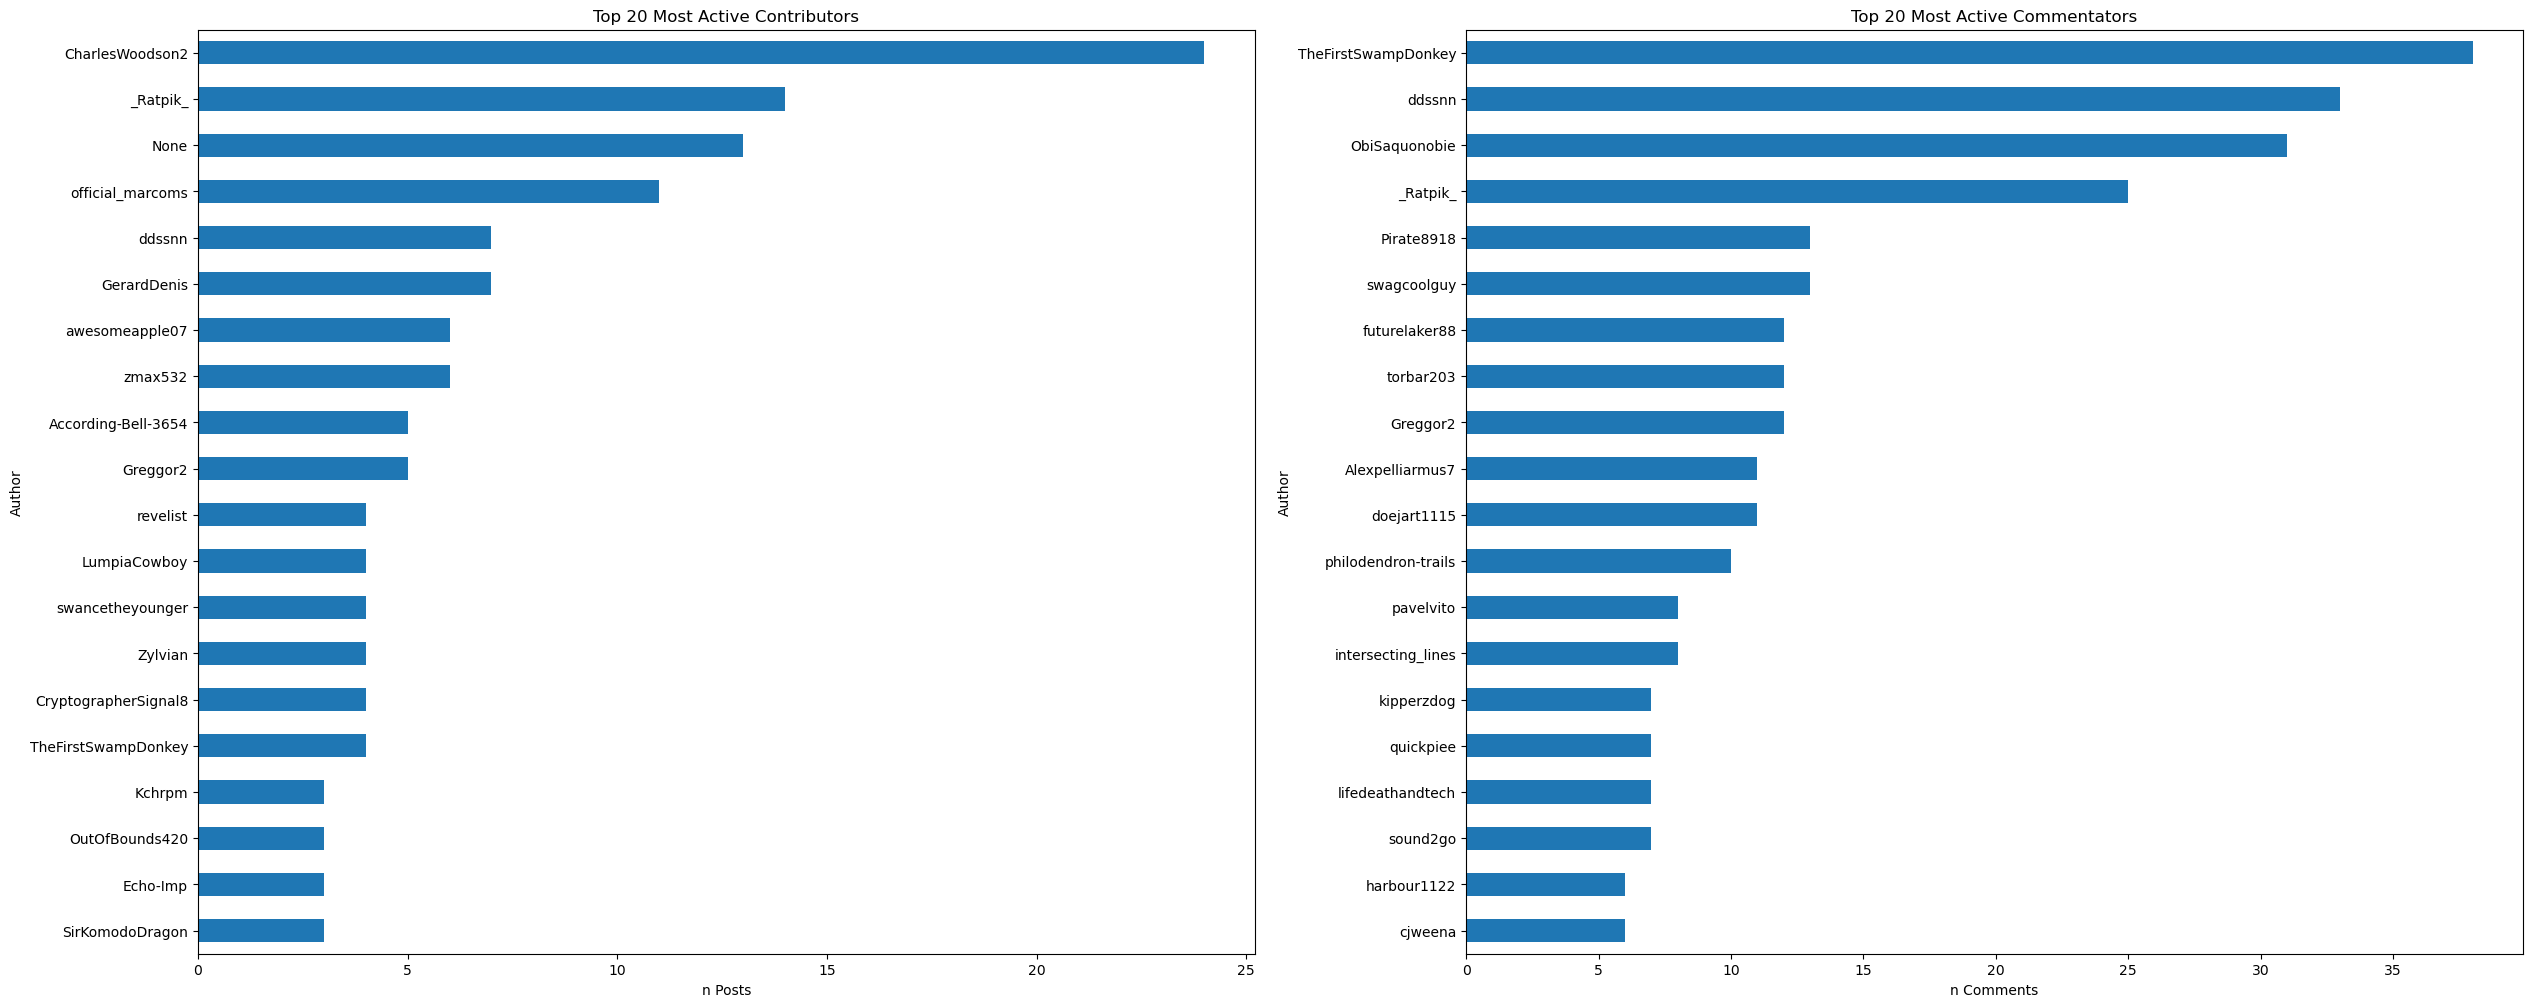

In [13]:
# Render a bar chart of the top 20 contributors, the top 20 commentators
plt.figure( figsize=(30,12))
plt.subplot(1, 2, 1)
top20 = posts_df['author'].value_counts().sort_values(ascending=False).head(20)
top20.sort_values().plot.barh( )
plt.title("Top 20 Most Active Contributors")
plt.xlabel("n Posts")
plt.ylabel("Author")

plt.subplot(1, 2, 2)
top20 = comments_df['author'].value_counts().sort_values(ascending=False).head(20)
top20.sort_values().plot.barh( )
plt.title("Top 20 Most Active Commentators")
plt.xlabel("n Comments")
plt.ylabel("Author")

plt.show()


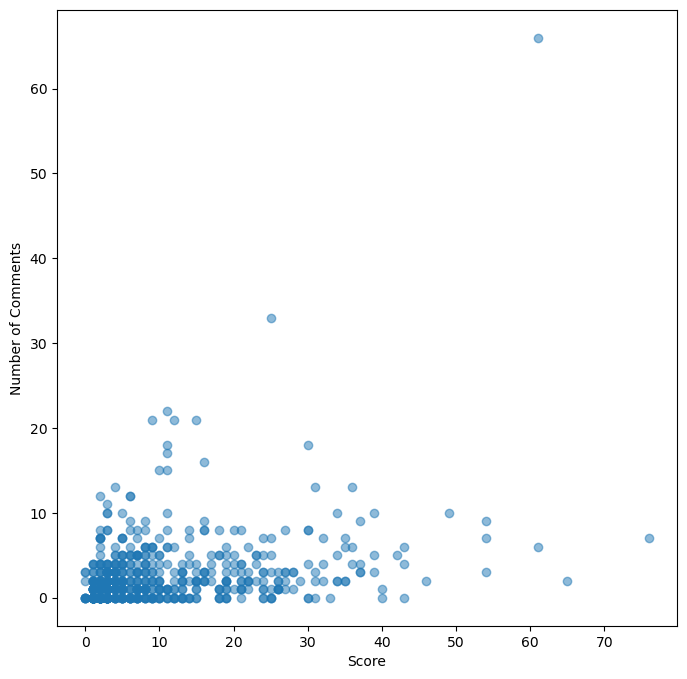

In [18]:
# Create a scatter plot to see the relationship between score and number of comments
plt.figure( figsize=(8,8))
plt.scatter( posts_df['score'],posts_df['num_comments'],alpha=0.5)
plt.xlabel("Score")
plt.ylabel("Number of Comments")
plt.show()

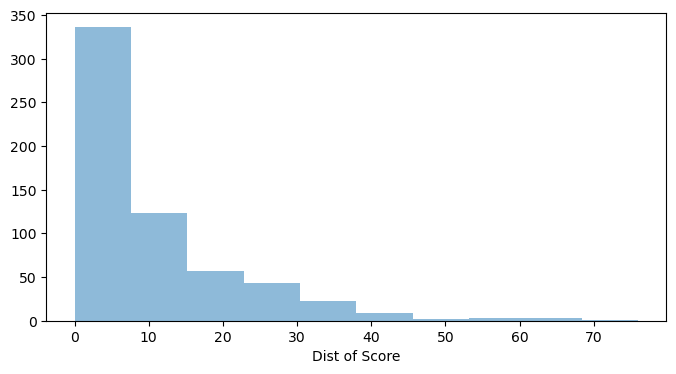

In [33]:
# Let's see the distribution of scores
plt.figure( figsize=(8,4))
plt.hist( posts_df['score'],alpha=0.5, bins=10)
plt.xlabel("Dist of Score")
plt.show()

In [30]:
# Close the connection
db.close()

# Analysis

I started by importing the libraries we need for getting data from Reddit, persisting data in Sqlite3, visualizing and analyzing data:

* **pandas:** working with dataframes, accessing data stores, data analytics, and data visualization
* **matplotlib:** data visualization
* **sqlite3:** a lightweight, SQL compliant, disk-based database implemented in C
* **praw:** praw (Python Reddit API Wrapper) provides access to the Reddit API from python
* **credentials:** a resource file storing tokens for API access

Next, several steps are taken to prepare the database:

* Open a connection to a database file 'LawrenceTheFans.db'. This invocation creates the file if it does not exist.  
* Obtain a cursor with which we can send and receive instructions and data to/from the database.
* Create two tables to store posts and comments.
    * Primary keys help ensure unique values
    * Foreign key on the comments table will help maintain referential integrity to the posts table

At this point, the database is ready for use.

Next, I instantiated the Reddit object using credentials from the 'credentials.py' file. The Reddit object acts as a façade to the Reddit API. Using this object we will access the target Subreddit: LawrenceTheFans which is a forum for fans of the band "Lawrence".  I've using two functions of the Subreddit class:
* **new()** returns a ListingGenerator for new submissions
* **comments()** returns an instance of CommentHelper (which wraps a ListingGenerator for comments)

ListingGenerator behaves as an iterator; I've used a for loop to iterate through the ListingGenerator collections.  In the body of the for loops, SQL insert statements are constructed using f-strings and enclosed in try/except blocks. This is to handle SQL exceptions such as unique constraint violations or invalid parameters such as special characters in strings.  Character substitution to account for apostrophe marks is performed to ensure that text values are well-formatted for insertion.

Having poplulated the tables, I performed some data exploration and visualization:
* Rendered bar charts to see the top contributors and the top commentators
* Generated a scatterplot to see what the relationship between the number of comments and the post scores might be
* Created a histogram to see how post scores are distributed

Finally, close the database connection.  Best practice.

This is a pretty small community, and a small dataset.  I chose it because it's something I'm interested in.  It might be necessary to choose a more popular subreddit for future exercises.